In [64]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError, Huber
import keras_tuner as kt
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [65]:
df = pd.read_csv("C:/Users/anand/Documents/Capstone Files Dump/Test case 1/processed_cryptodata.csv")

In [66]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

C:\Users\anand\AppData\Local\Temp\ipykernel_36660\1383876153.py:2: UserWarning:

Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [67]:
df.shape

(7200, 25)

In [68]:
crypto = "Solana"

In [69]:
# Selecting relevant columns for LSTM
features = ['Open', 'High', 'Low', 'Volume', 'VWAP', 'Volatility', 'Price_Change', 'RSI', 'MACD',
            'MA_7', 'MA_14', 'EMA_7', 'EMA_14', 'Rolling_Std_7', 'Rolling_Std_14',
            'Day_of_Week', 'Month', 'Week_of_Year', 'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3']
target = 'Close'

In [70]:
crypto_df = df[df['Crypto'] == crypto].drop(columns=['Crypto']).dropna()

In [71]:
crypto_df.shape

(707, 24)

In [72]:
crypto_df.isnull().sum()

Timestamp         0
Open              0
High              0
Low               0
Close             0
VWAP              0
Volume            0
Count             0
Volatility        0
Price_Change      0
RSI               0
MA_7              0
MA_14             0
Close_Lag_1       0
Close_Lag_2       0
Close_Lag_3       0
Rolling_Std_7     0
Rolling_Std_14    0
EMA_7             0
EMA_14            0
MACD              0
Day_of_Week       0
Month             0
Week_of_Year      0
dtype: int64

In [73]:
crypto_df.head()


,Timestamp,Open,High,Low,Close,VWAP,Volume,Count,Volatility,Price_Change,...,Close_Lag_2,Close_Lag_3,Rolling_Std_7,Rolling_Std_14,EMA_7,EMA_14,MACD,Day_of_Week,Month,Week_of_Year
6493,2023-03-08,20.25,20.36,18.12,18.39,18.97,3.581076e+05,6793,2.24,-1.85,...,20.60,21.00,1.146647,1.437014,20.452230,21.392849,-0.940619,2,3,10
6494,2023-03-09,18.42,18.77,16.71,17.35,17.61,7.242874e+05,9372,2.06,-1.04,...,20.24,20.60,1.527544,1.714972,19.676672,20.853803,-1.177130,3,3,10
6495,2023-03-10,17.35,18.38,16.00,18.27,17.24,5.558306e+05,9290,2.38,0.92,...,18.39,20.24,1.504365,1.803384,19.325004,20.509296,-1.184291,4,3,10
6496,2023-03-11,18.22,19.05,16.82,18.22,17.93,5.310319e+05,9551,2.23,-0.05,...,17.35,18.39,1.424192,1.887209,19.048753,20.204056,-1.155303,5,3,10
6497,2023-03-12,18.21,20.63,17.89,20.29,19.09,1.224381e+06,13807,2.74,2.07,...,18.27,17.35,1.289644,1.726311,19.359065,20.215515,-0.856450,6,3,10


In [74]:
# 🚀 Drop Remaining Rows with Missing Values
df.dropna(inplace=True)

# ✅ Verify all missing values are gone
print(df.isnull().sum())  # Should print all zeros

# ✅ Check dataset size after dropping rows
print(f"Dataset size after dropping missing values: {crypto_df.shape}")


Timestamp         0
Open              0
High              0
Low               0
Close             0
VWAP              0
Volume            0
Count             0
Crypto            0
Volatility        0
Price_Change      0
RSI               0
MA_7              0
MA_14             0
Close_Lag_1       0
Close_Lag_2       0
Close_Lag_3       0
Rolling_Std_7     0
Rolling_Std_14    0
EMA_7             0
EMA_14            0
MACD              0
Day_of_Week       0
Month             0
Week_of_Year      0
dtype: int64
Dataset size after dropping missing values: (707, 24)


In [75]:
cleaned_csv_path = "C:/Users/anand/Documents/Capstone Files Dump//Test case 1/cleaned_solana_data.csv"
crypto_df.to_csv(cleaned_csv_path, index=False)

# Confirm file saved
print(f"Cleaned dataset saved at: {cleaned_csv_path}")

Cleaned dataset saved at: C:/Users/anand/Documents/Capstone Files Dump//Test case 1/cleaned_solana_data.csv


In [76]:
df = pd.read_csv("C:/Users/anand/Documents/Capstone Files Dump/Test case 1/cleaned_solana_data.csv")

In [77]:
df = df.sort_values(by=['Timestamp'])

In [78]:
import plotly.express as px

fig = px.line(df, x=df['Timestamp'], y=df['Close'], labels={'Timestamp': 'Date', 'Close': 'Close Price'})


# Update trace settings
fig.update_traces(
    marker_line_width=2, 
    opacity=0.8, 
    marker_line_color='orange'
)

# Update layout with title and styling
fig.update_layout(
    title_text='Whole period of timeframe of Solana close price ',
    plot_bgcolor='white',
    font_size=15,
    font_color='black'
)

# Remove grid from x and y axes
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

# Show plot
fig.show()

Trial 15 Complete [00h 01m 08s]
val_loss: 0.0029806524980813265

Best val_loss So Far: 0.0013866923982277513
Total elapsed time: 00h 13m 30s
Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 30s 681ms/step - loss: 0.3948 - val_loss: 0.0080
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 18s 537ms/step - loss: 0.0050 - val_loss: 0.0149
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 191ms/step - loss: 0.0017 - val_loss: 0.0052
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - loss: 0.0011 - val_loss: 0.0041
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - loss: 9.0419e-04 - val_loss: 0.0051
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - loss: 7.9897e-04 - val_loss: 0.0039
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - loss: 7.3719e-04 - val_loss: 0.0042
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 194ms/step - loss: 5.3157e-04 - val_loss: 0.0030
Epoch 9/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 368ms/step - loss: 6.0653e-04 - val_loss: 0.0021
Epoch 10/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 355ms/step - loss: 5.

Model saved: models/LSTM_Solana.h5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 246ms/step


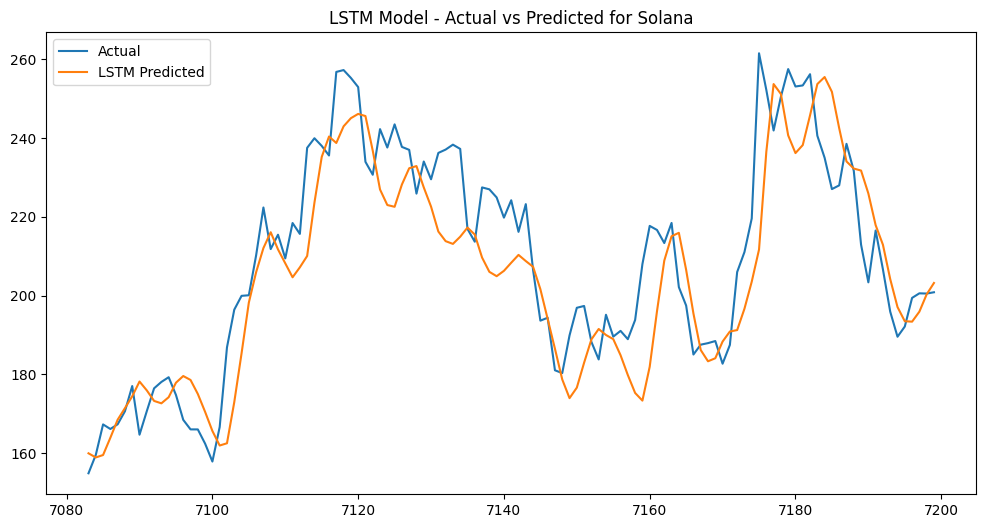

Performance for Solana: {'MAE': np.float64(10.516491448818106), 'MSE': np.float64(183.93966017610902), 'RMSE': np.float64(13.562435628459552), 'R-squared': 0.753902676499847}


: 

In [ ]:
# Normalize data using MinMaxScaler
scaler_features = MinMaxScaler()
scaler_target = MinMaxScaler()
crypto_scaled_features = scaler_features.fit_transform(crypto_df[features])  
target_scaled = scaler_target.fit_transform(crypto_df[[target]])  

# Combine after scaling
crypto_scaled = np.hstack((crypto_scaled_features, target_scaled))
crypto_scaled = pd.DataFrame(crypto_scaled, columns=features + [target], index=crypto_df.index)

# Train-Test Split
train_size = int(len(crypto_scaled) * 0.8)
train, test = crypto_scaled.iloc[:train_size], crypto_scaled.iloc[train_size:]

# Dynamic Sequence Length Tuning
def create_sequences(data, seq_length):
    x_data, y_data = [], []
    for i in range(seq_length, len(data)):
        x_data.append(data.iloc[i-seq_length:i][features].values)
        y_data.append(data.iloc[i][target])
    return np.array(x_data), np.array(y_data)

# Define Model for Keras Tuner
def build_model(hp):
    sequence_length = hp.Int('sequence_length', min_value=5, max_value=30, step=5)

    model = Sequential([
        Input(shape=(sequence_length, len(features))),
        Bidirectional(LSTM(hp.Int('units_1', min_value=64, max_value=512, step=64), return_sequences=True)),
        Dropout(hp.Float('dropout_1', 0.005, 0.02, step=0.005)),

        LSTM(hp.Int('units_2', min_value=64, max_value=512, step=64), return_sequences=True),
        Dropout(hp.Float('dropout_2', 0.005, 0.02, step=0.005)),

        LSTM(hp.Int('units_3', min_value=64, max_value=512, step=64), return_sequences=False),
        Dropout(hp.Float('dropout_3', 0.005, 0.02, step=0.005)),

        Dense(hp.Int('dense_units', 32, 128, step=32), activation='tanh'),
        Dense(1, activation='linear')
    ])

    # Choose loss function dynamically
    loss_fn = hp.Choice('loss_function', ['mse', 'huber'])

    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', [0.0005, 0.001, 0.002, 0.003])),
                  loss=MeanSquaredError() if loss_fn == 'mse' else Huber(delta=2))  # Huber Loss adjusted for Litecoin
    return model

# Setup Keras Tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=15,  # Increase trials for better optimization
    executions_per_trial=1,
    directory='lstm_tuning',
    project_name=f'crypto_forecasting_{crypto}',
    overwrite=True
)

# Run Hyperparameter Tuning
x_train, y_train = create_sequences(train, 10)  # Temporary value, will be optimized
x_test, y_test = create_sequences(test, 10)

tuner.search(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=32, verbose=1)

# Get Best Hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
optimal_sequence_length = best_hps.get('sequence_length')

# Train Final Model with Best Sequence Length
x_train, y_train = create_sequences(train, optimal_sequence_length)
x_test, y_test = create_sequences(test, optimal_sequence_length)

model = build_model(best_hps)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=32, verbose=1, callbacks=[early_stopping])

# Save Model
model.save(os.path.join("models", f"LSTM_{crypto}.h5"))
print(f"Model saved: models/LSTM_{crypto}.h5")

# Make Predictions
y_pred = model.predict(x_test)
y_pred_rescaled = scaler_target.inverse_transform(y_pred.reshape(-1, 1))[:, 0]
y_test_rescaled = scaler_target.inverse_transform(y_test.reshape(-1, 1))[:, 0]

# Plot Predictions
plt.figure(figsize=(12, 6))
plt.plot(test.index[optimal_sequence_length:], y_test_rescaled, label="Actual")
plt.plot(test.index[optimal_sequence_length:], y_pred_rescaled, label="LSTM Predicted")
plt.title(f"LSTM Model - Actual vs Predicted for {crypto}")
plt.legend()
plt.show()

# Compute Performance Metrics
performance_metrics = {
    "MAE": mean_absolute_error(y_test_rescaled, y_pred_rescaled),
    "MSE": mean_squared_error(y_test_rescaled, y_pred_rescaled),
    "RMSE": np.sqrt(mean_squared_error(y_test_rescaled, y_pred_rescaled)),
    "R-squared": r2_score(y_test_rescaled, y_pred_rescaled)
}

# Print & Save Metrics
print(f"Performance for {crypto}: {performance_metrics}")
pd.DataFrame([performance_metrics]).to_csv(f"LSTM_Performance_{crypto}.csv", index=False)

Prompt//I already have .h5 file for solana model training on LSTM. and I want to build a model on SARIMAX and compare which model is performing better and which is predicting the future close prices with more accuracy. The matrices I used for for LSTM are MSE, MAE, RMSE, and r2. I want to perform same with solana too.

In [13]:
import pandas as pd

# Load the Bitcoin dataset
solana_data_path = "C:/Users/anand/Documents/Capstone Files Dump/Test case 1/separatemodeltraining/cleaned_solana_data.csv"
solana_df = pd.read_csv(solana_data_path)

# Convert Timestamp to datetime
solana_df['Timestamp'] = pd.to_datetime(solana_df['Timestamp'])
solana_df.set_index('Timestamp', inplace=True)

# Define target variable (Close price)
close_prices = solana_df['Close']

# Define exogenous features
features = ['MACD', 'EMA_7', 'Close_Lag_1']
exog_features = solana_df[features]

# Display first few rows
print(solana_df.head())

             Open   High    Low  Close   VWAP        Volume  Count  \
Timestamp                                                            
2023-03-08  20.25  20.36  18.12  18.39  18.97  3.581076e+05   6793   
2023-03-09  18.42  18.77  16.71  17.35  17.61  7.242874e+05   9372   
2023-03-10  17.35  18.38  16.00  18.27  17.24  5.558306e+05   9290   
2023-03-11  18.22  19.05  16.82  18.22  17.93  5.310319e+05   9551   
2023-03-12  18.21  20.63  17.89  20.29  19.09  1.224381e+06  13807   

            Volatility  Price_Change        RSI  ...  Close_Lag_2  \
Timestamp                                        ...                
2023-03-08        2.24         -1.85  18.254879  ...        20.60   
2023-03-09        2.06         -1.04  16.307692  ...        20.24   
2023-03-10        2.38          0.92  25.534079  ...        18.39   
2023-03-11        2.23         -0.05  27.401747  ...        17.35   
2023-03-12        2.74          2.07  35.499515  ...        18.27   

            Close_Lag_3  

In [14]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF Test on Close Price
adf_test = adfuller(close_prices)

print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

if adf_test[1] < 0.05:
    print("✅ Data is stationary, ARIMA can be applied directly (d=0).")
else:
    print("⚠️ Data is non-stationary, differencing is required (d>0).")

ADF Statistic: -0.9977213207211217
p-value: 0.7540944895058739
⚠️ Data is non-stationary, differencing is required (d>0).


In [15]:
# Apply first-order differencing if needed
diff_close_prices = close_prices.diff().dropna()

# Perform ADF test again
adf_test_diff = adfuller(diff_close_prices)

print(f"After Differencing - ADF Statistic: {adf_test_diff[0]}")
print(f"After Differencing - p-value: {adf_test_diff[1]}")

if adf_test_diff[1] < 0.05:
    print("✅ Data is now stationary, ARIMA can be applied with d=1.")
else:
    print("⚠️ Still non-stationary, consider d=2.")

After Differencing - ADF Statistic: -26.83574631099427
After Differencing - p-value: 0.0
✅ Data is now stationary, ARIMA can be applied with d=1.


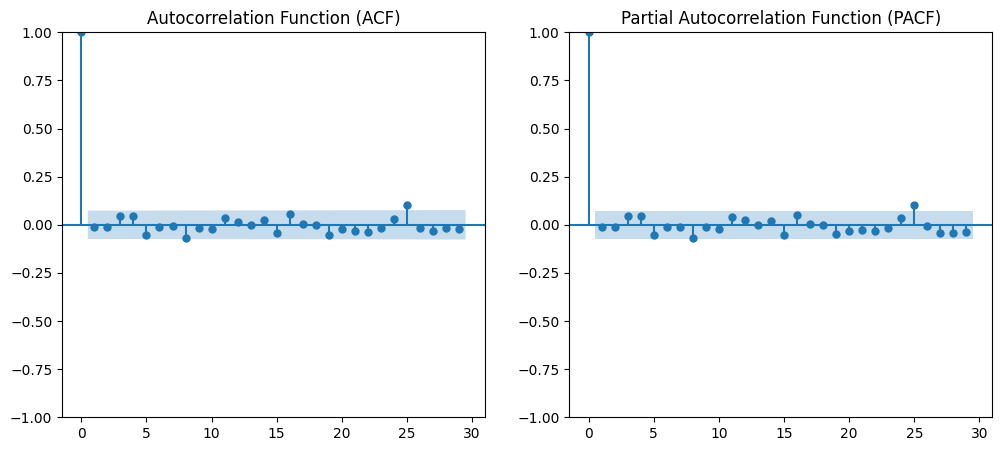

In [16]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF & PACF
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ACF Plot (for q)
plot_acf(diff_close_prices, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")

# PACF Plot (for p)
plot_pacf(diff_close_prices, ax=axes[1])
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.show()

In [6]:
import itertools
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

# Define possible values for p, d, q, P, D, Q
p = range(0, 3)
d = range(0, 2)
q = range(0, 3)
P = range(0, 2)
D = range(0, 2)
Q = range(0, 2)
s = [7]  # Weekly seasonality

best_mae = float("inf")
best_params = None
best_model = None

# Grid search over all combinations
for param in itertools.product(p, d, q, P, D, Q, s):
    try:
        model = SARIMAX(close_prices, exog=exog_features, order=param[:3], seasonal_order=param[3:])
        result = model.fit(disp=False)
        
        # Forecast for last 30 days
        forecast = result.forecast(steps=30, exog=exog_features.iloc[-30:])
        
        # Compute MAE
        mae = mean_absolute_error(close_prices[-30:], forecast)
        
        if mae < best_mae:
            best_mae = mae
            best_params = param
            best_model = result
    
    except:
        continue

print(f"✅ Best SARIMAX Parameters: {best_params} with MAE: {best_mae}")

c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\s

✅ Best SARIMAX Parameters: (0, 0, 0, 1, 1, 0, 7) with MAE: 7.377432982754949


c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Train the final optimized SARIMAX model
sarimax_final = SARIMAX(close_prices, exog=exog_features,
                        order=(0, 0, 0), seasonal_order=(1, 1, 0, 7))
sarimax_result_final = sarimax_final.fit()

# Print summary of the final model
print(sarimax_result_final.summary())

c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                SARIMAX Results                                
Dep. Variable:                   Close   No. Observations:                  707
Model:             SARIMAX(1, 1, 0, 7)   Log Likelihood               -2202.190
Date:                 Tue, 18 Mar 2025   AIC                           4414.381
Time:                         11:52:52   BIC                           4437.136
Sample:                     03-08-2023   HQIC                          4423.177
                          - 02-11-2025                                         
Covariance Type:                   opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
MACD            1.3809      0.055     24.937      0.000       1.272       1.489
EMA_7           0.6554      0.033     19.884      0.000       0.591       0.720
Close_Lag_1     0.1226      0.034      3

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Forecast next 30 days
sarimax_forecast = sarimax_result_final.forecast(steps=30, exog=exog_features.iloc[-30:])

# Compute Performance Metrics
mae_sarimax = mean_absolute_error(close_prices[-30:], sarimax_forecast)
mse_sarimax = mean_squared_error(close_prices[-30:], sarimax_forecast)
rmse_sarimax = np.sqrt(mse_sarimax)
r2_sarimax = r2_score(close_prices[-30:], sarimax_forecast)

sarimax_performance = {
    "MAE": mae_sarimax,
    "MSE": mse_sarimax,
    "RMSE": rmse_sarimax,
    "R-squared": r2_sarimax
}

print("📊 Final SARIMAX Performance Metrics:", sarimax_performance)


📊 Final SARIMAX Performance Metrics: {'MAE': np.float64(7.377432982754949), 'MSE': np.float64(86.91953663829231), 'RMSE': np.float64(9.323064766389447), 'R-squared': 0.8493300468008546}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


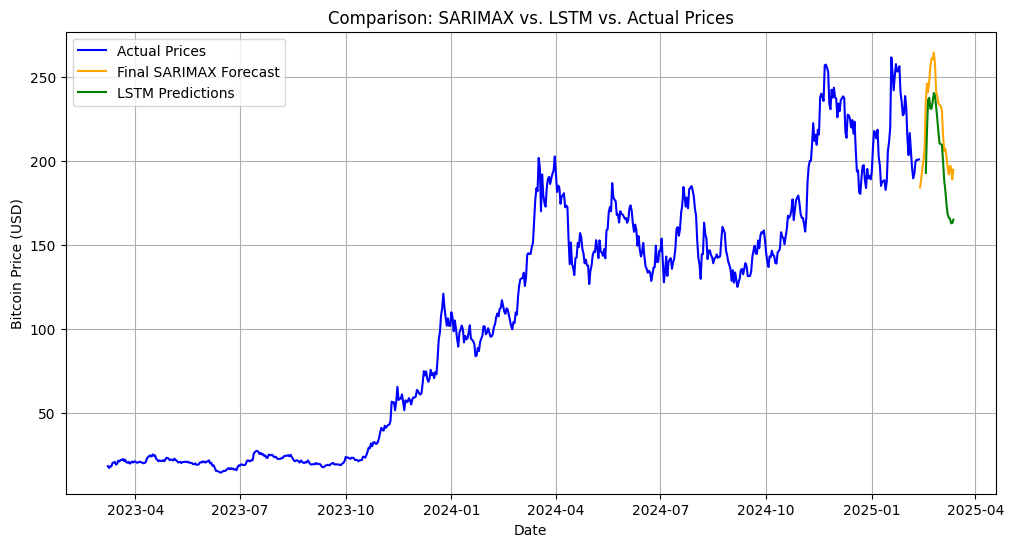

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

# Load trained LSTM model
lstm_model_path = "C:/Users/anand/Documents/Capstone Files Dump/Test case 1/models/LSTM_Solana.h5"
lstm_model = load_model(lstm_model_path)

# Normalize data before feeding into LSTM
features = ['Open', 'High', 'Low', 'Volume', 'VWAP', 'Volatility', 'Price_Change', 'RSI', 'MACD',
            'MA_7', 'MA_14', 'EMA_7', 'EMA_14', 'Rolling_Std_7', 'Rolling_Std_14',
            'Day_of_Week', 'Month', 'Week_of_Year', 'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3']
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(solana_df[features])

# Prepare test data for LSTM
look_back = 5
test_scaled = scaled_data[-30:]  # Last 30 days for testing
X_test = []
for i in range(look_back, len(test_scaled)):
    X_test.append(test_scaled[i - look_back:i, :])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], look_back, len(features)))

# LSTM Predictions
lstm_predictions = lstm_model.predict(X_test)

# Inverse transform predictions
lstm_predictions = scaler.inverse_transform(
    np.concatenate([np.zeros((lstm_predictions.shape[0], len(features)-1)), lstm_predictions], axis=1)
)[:, -1]  # Extract only Close Price

# Generate future dates for plotting (30 days ahead)
final_future_dates = pd.date_range(start=close_prices.index[-1], periods=30 + 1, freq='D')[1:]

# Adjust test index for LSTM predictions (aligned with available test data)
lstm_test_index = final_future_dates[look_back:]

# Plot SARIMAX vs. LSTM vs. Actual Prices
plt.figure(figsize=(12, 6))
plt.plot(close_prices.index, close_prices, label="Actual Prices", color='blue')
plt.plot(final_future_dates, sarimax_forecast, label="Final SARIMAX Forecast", color='orange')
plt.plot(lstm_test_index, lstm_predictions, label="LSTM Predictions", color='green')

plt.xlabel('Date')
plt.ylabel('Bitcoin Price (USD)')
plt.title("Comparison: SARIMAX vs. LSTM vs. Actual Prices")
plt.legend()
plt.grid()
plt.show()


In [20]:
# Save the trained SARIMAX model
sarimax_model_path = "C:/Users/anand/Documents/Capstone Files Dump/Test case 1/SARIMAX_model/SARIMAX_Solana.pkl"
sarimax_result_final.save(sarimax_model_path)


c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


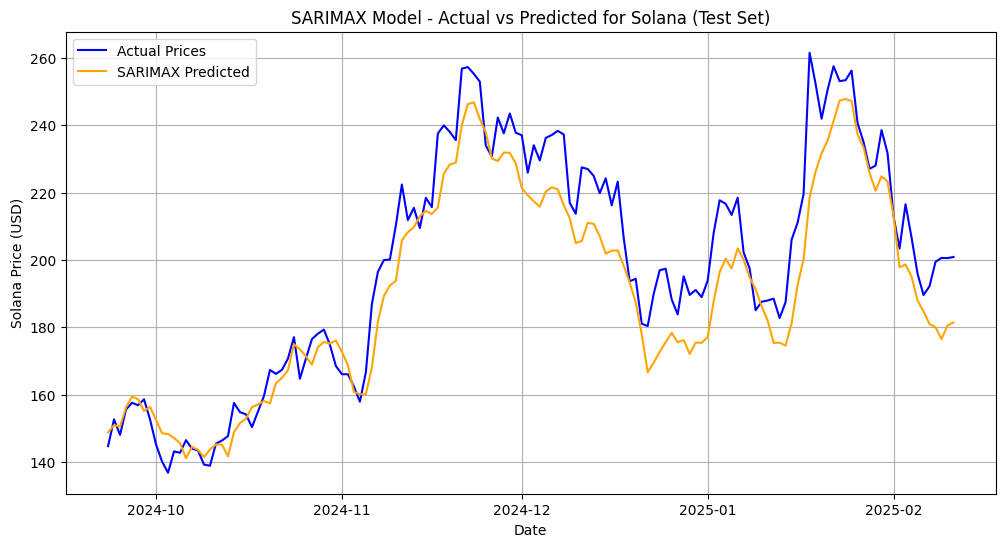

{'MAE': np.float64(9.764035803170279),
 'MSE': np.float64(150.21496226077554),
 'RMSE': np.float64(12.25622136960554),
 'R² Score': 0.871297501144896}

In [21]:
# Split data into 80% train and 20% test sets
train_size = int(len(close_prices) * 0.8)
train_y, test_y = close_prices[:train_size], close_prices[train_size:]
train_exog, test_exog = exog_features[:train_size], exog_features[train_size:]

# Train SARIMAX using best-found parameters
sarimax_model = SARIMAX(train_y, exog=train_exog, order=(0, 0, 0), seasonal_order=(1, 1, 0, 7))
sarimax_result = sarimax_model.fit(disp=False)

# Predict for the test set
sarimax_pred = sarimax_result.predict(start=len(train_y), end=len(close_prices)-1, exog=test_exog)

# Compute Performance Metrics for SARIMAX
mae_sarimax = mean_absolute_error(test_y, sarimax_pred)
mse_sarimax = mean_squared_error(test_y, sarimax_pred)
rmse_sarimax = np.sqrt(mse_sarimax)
r2_sarimax = r2_score(test_y, sarimax_pred)

sarimax_performance = {
    "MAE": mae_sarimax,
    "MSE": mse_sarimax,
    "RMSE": rmse_sarimax,
    "R² Score": r2_sarimax
}

# Plot SARIMAX predictions vs Actual values
plt.figure(figsize=(12, 6))
plt.plot(test_y.index, test_y, label="Actual Prices", color='blue')
plt.plot(test_y.index, sarimax_pred, label="SARIMAX Predicted", color='orange')

plt.xlabel('Date')
plt.ylabel('Solana Price (USD)')
plt.title("SARIMAX Model - Actual vs Predicted for Solana (Test Set)")
plt.legend()
plt.grid()
plt.show()

# Display SARIMAX performance
sarimax_performance

1/5 ━━━━━━━━━━━━━━━━━━━━ 1s 456ms/stepWARNING:tensorflow:5 out of the last 8 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000002170A527600> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step


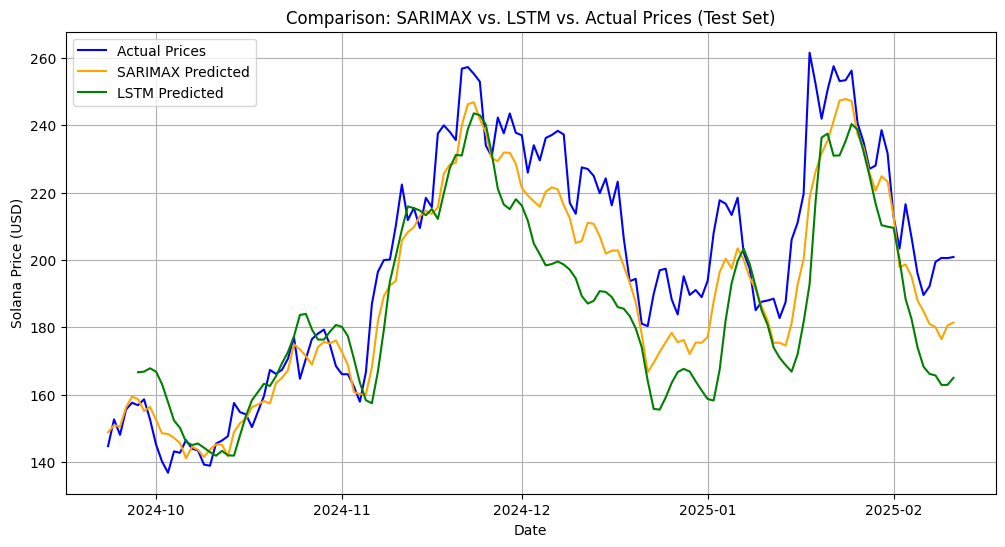

In [23]:
# Load the trained LSTM model
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

# Define path to LSTM model
lstm_model_path = "C:/Users/anand/Documents/Capstone Files Dump/Test case 1/models/LSTM_Solana.h5"

# Load the model
lstm_model = load_model(lstm_model_path)

# Normalize data before feeding into LSTM
features = ['Open', 'High', 'Low', 'Volume', 'VWAP', 'Volatility', 'Price_Change', 'RSI', 'MACD',
            'MA_7', 'MA_14', 'EMA_7', 'EMA_14', 'Rolling_Std_7', 'Rolling_Std_14',
            'Day_of_Week', 'Month', 'Week_of_Year', 'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3']

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(solana_df[features])

# Prepare test data for LSTM
look_back = 5
test_scaled = scaled_data[-len(test_y):]  # Use test data for LSTM
X_test = []
for i in range(look_back, len(test_scaled)):
    X_test.append(test_scaled[i - look_back:i, :])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], look_back, len(features)))

# Generate LSTM Predictions
lstm_predictions = lstm_model.predict(X_test)

# Inverse transform predictions
lstm_predictions = scaler.inverse_transform(
    np.concatenate([np.zeros((lstm_predictions.shape[0], len(features) - 1)), lstm_predictions], axis=1)
)[:, -1]  # Extract only Close Price

# Adjust test index for LSTM predictions (aligned with available test data)
lstm_test_index = test_y.index[look_back:]

# Plot SARIMAX vs. LSTM vs. Actual Prices
plt.figure(figsize=(12, 6))
plt.plot(test_y.index, test_y, label="Actual Prices", color='blue')
plt.plot(test_y.index, sarimax_pred, label="SARIMAX Predicted", color='orange')
plt.plot(lstm_test_index, lstm_predictions, label="LSTM Predicted", color='green')

plt.xlabel('Date')
plt.ylabel('Solana Price (USD)')
plt.title("Comparison: SARIMAX vs. LSTM vs. Actual Prices (Test Set)")
plt.legend()
plt.grid()
plt.show()